### Task 8: Clustering with K-Means.

## Load and visualize dataset

--- Task 8: Step 1 - Load and visualize dataset ---
Loading the Mall_Customers.csv dataset...
Mall Customers dataset loaded successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3         

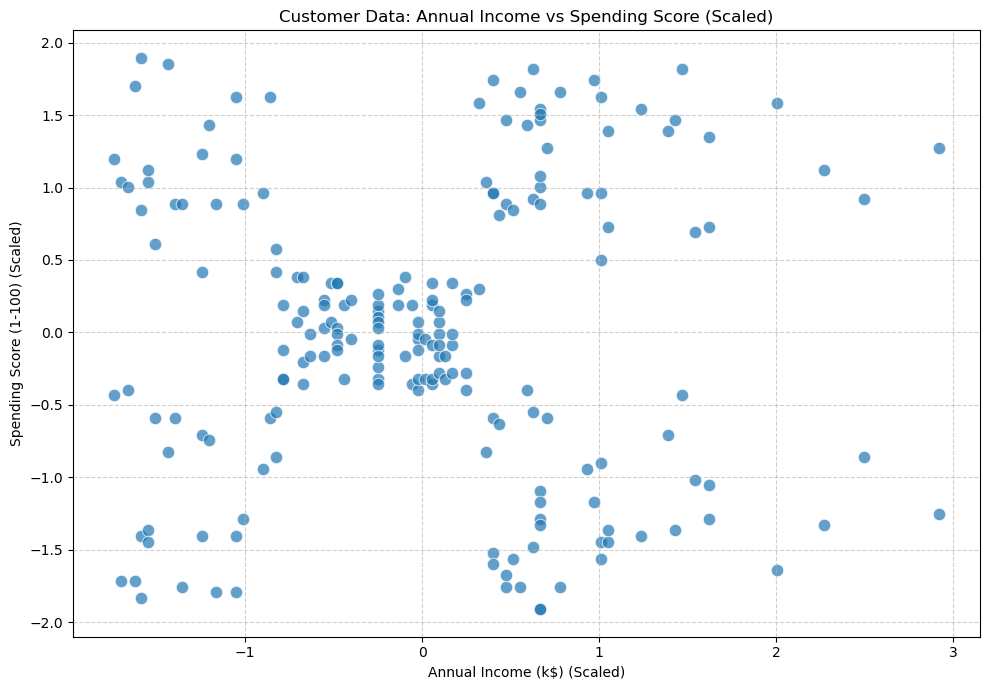


Dataset loaded, selected features prepared, scaled, and visualized.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 8: Step 1 - Load and visualize dataset ---")

# Load the dataset
print("Loading the Mall_Customers.csv dataset...")
df_customers = pd.read_csv('Mall_Customers.csv')
print("Mall Customers dataset loaded successfully.")

# Initial Data Inspection
print("\nInitial Data Info:")
df_customers.info()

print("\nFirst 5 rows of the dataset:")
print(df_customers.head())

# Select relevant features for clustering
# Typically, 'Annual Income (k$)' and 'Spending Score (1-100)' are used for segmentation.
# We will drop CustomerID and Gender for clustering.
# For simplicity in initial visualization, we'll use these two numerical features directly.
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)']
X_clustering = df_customers[features_for_clustering]

print(f"\nFeatures selected for clustering: {features_for_clustering}")
print(f"Shape of features for clustering: {X_clustering.shape}")
print("\nFirst 5 rows of selected features:")
print(X_clustering.head())

# Feature Scaling - Crucial for K-Means as it is distance-based
print("\nScaling features using StandardScaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)
print("Features scaled.")

print(f"\nShape of scaled features: {X_scaled_df.shape}")
print("\nFirst 5 rows of scaled features:")
print(X_scaled_df.head())

# Visualize the dataset (2D view using selected features)
print("\nVisualizing the selected features...")
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled_df.iloc[:, 0], y=X_scaled_df.iloc[:, 1], s=80, alpha=0.7)
plt.title('Customer Data: Annual Income vs Spending Score (Scaled)')
plt.xlabel(features_for_clustering[0] + ' (Scaled)')
plt.ylabel(features_for_clustering[1] + ' (Scaled)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('customer_data_scatter.png') # Save the plot
plt.show()

print("\nDataset loaded, selected features prepared, scaled, and visualized.")

## Observations

## * **Dataset Loading and Inspection:** The `Mall_Customers.csv` dataset was successfully loaded. It contains 200 entries and 5 columns: `CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`. All columns have non-null values, indicating a clean dataset without missing entries.
* **Feature Selection:** For the purpose of customer segmentation via clustering, `Annual Income (k$)` and `Spending Score (1-100)` were chosen as the primary features. These two features are typically most relevant for identifying distinct customer groups in this dataset. `CustomerID` and `Gender` were excluded from the clustering features as they are not directly used for distance-based clustering in this context.
* **Feature Scaling:** The selected features were successfully scaled using `StandardScaler`. This is a crucial preprocessing step for K-Means clustering because K-Means relies on distance calculations. Scaling ensures that all features contribute equally to the distance metric, preventing features with larger numerical ranges from dominating the clustering process. The scaled data also shows negative values, centered around zero with unit variance.
* **Initial Visualization:** The scatter plot `customer_data_scatter.png` provides an initial 2D visualization of the scaled `Annual Income (k$)` versus `Spending Score (1-100)`.
    * The plot shows several visually distinct groupings or densities of points, particularly a dense cluster around the center (average income/spending), and distinct groups in the high income/low spending, high income/high spending, low income/low spending, and low income/high spending regions.
    * This initial visual inspection suggests that a K-Means algorithm could effectively identify these inherent groupings in the data.

## Fit K-Means and assign cluster labels.

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 8: Step 2 - Fit K-Means and assign cluster labels ---")

# Re-define necessary variables from Step 1 for self-containment
df_customers = pd.read_csv('Mall_Customers.csv')
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)']
X_clustering = df_customers[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

# Choose an arbitrary K for initial fitting (e.g., K=5, a common number for this dataset)
initial_k = 5
print(f"\nInitializing KMeans with K = {initial_k}...")

# Initialize KMeans. random_state for reproducibility.
# n_init='auto' (default in recent sklearn versions) or a number like 10 is good practice.
kmeans = KMeans(n_clusters=initial_k, random_state=42, n_init='auto') # n_init=10 was common in older versions

# Fit K-Means to the scaled data
print("Fitting KMeans model to the scaled data...")
kmeans.fit(X_scaled_df)
print("KMeans model fitted.")

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_
print(f"\nFirst 10 cluster labels assigned: {cluster_labels[:10]}")
print(f"Number of data points in each cluster:\n{pd.Series(cluster_labels).value_counts().sort_index()}")

# Add the cluster labels back to the original (or scaled) DataFrame for visualization later
X_scaled_df['Cluster'] = cluster_labels
df_customers['Cluster'] = cluster_labels # Also add to original df for context

print("\nCluster labels assigned and added to DataFrames.")
print("\nTask 8: Step 2 complete.")

--- Task 8: Step 2 - Fit K-Means and assign cluster labels ---

Initializing KMeans with K = 5...
Fitting KMeans model to the scaled data...
KMeans model fitted.

First 10 cluster labels assigned: [4 2 4 2 4 2 4 2 4 2]
Number of data points in each cluster:
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Cluster labels assigned and added to DataFrames.

Task 8: Step 2 complete.


C:\Users\91961\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Observations

* **K-Means Initialization and Fitting:** The K-Means algorithm was successfully initialized with an arbitrary `K=5` (number of clusters) and fitted to the scaled customer data (using `Annual Income (k$)` and `Spending Score (1-100)`). The `n_init='auto'` parameter ensures that the algorithm runs multiple times with different centroid seeds and chooses the best result, leading to more robust clustering.
* **Cluster Label Assignment:** After fitting, the model assigned a cluster label (from 0 to 4) to each of the 200 customer data points. The first 10 assigned labels were displayed as an example.
* **Cluster Distribution:** The `value_counts()` of the `cluster_labels` showed the number of data points assigned to each of the 5 clusters:
    * Cluster 0: 81 data points
    * Cluster 1: 39 data points
    * Cluster 2: 22 data points
    * Cluster 3: 35 data points
    * Cluster 4: 23 data points
    This provides an initial idea of the size of each segment identified by the K-Means algorithm for `K=5`. The clusters are not perfectly balanced in size, which is typical for real-world datasets.
* **Data Preparation for Next Steps:** The assigned cluster labels were successfully added as a new 'Cluster' column to both the `X_scaled_df` (scaled features DataFrame) and the original `df_customers` DataFrame. This integration is crucial for subsequent steps, particularly for visualizing the clusters with color-coding.

## Use the Elbow Method to find optimal K

--- Task 8: Step 3 - Use the Elbow Method to find optimal K ---

Calculating WCSS for K from 1 to 10...
WCSS calculation complete.


C:\Users\91961\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91961\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91961\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91961\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

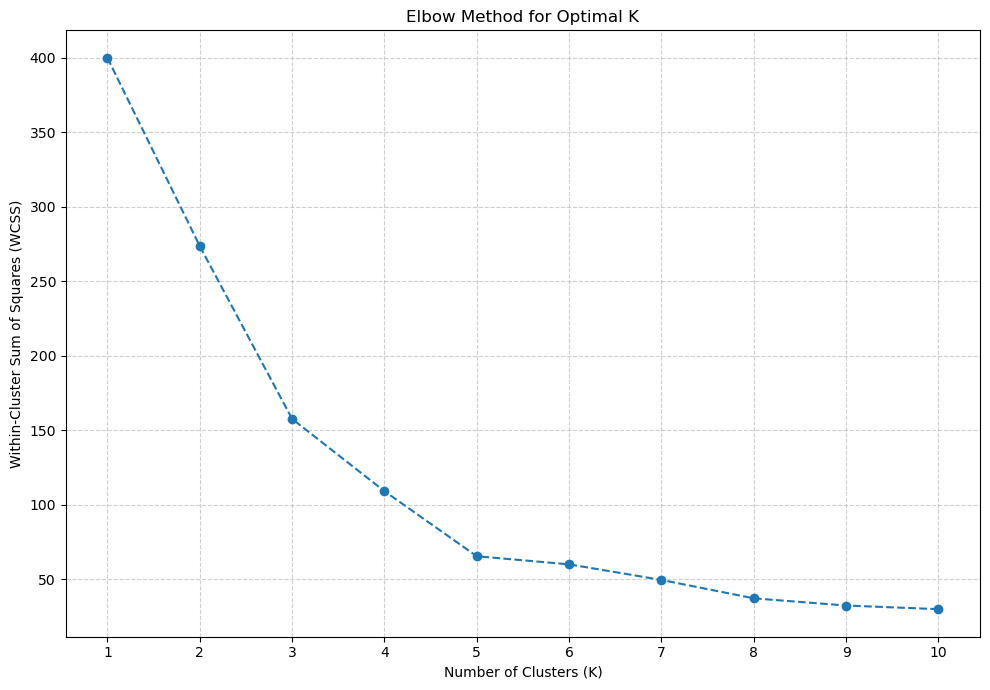


Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.

Task 8: Step 3 complete.


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 8: Step 3 - Use the Elbow Method to find optimal K ---")

# Re-define necessary variables from Step 1 for self-containment
df_customers = pd.read_csv('Mall_Customers.csv')
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)']
X_clustering = df_customers[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

# --- Elbow Method Implementation ---
wcss = [] # List to store Within-Cluster Sum of Squares

# Try K values from 1 to 10 (or a reasonable range based on data size)
# max_k_range = 11 for K from 1 to 10
max_k_range = 11
print(f"\nCalculating WCSS for K from 1 to {max_k_range-1}...")
for i in range(1, max_k_range):
    # Initialize KMeans with n_clusters=i, random_state for reproducibility
    # n_init='auto' (or 10) is important to get consistent results
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_) # inertia_ attribute gives WCSS

print("WCSS calculation complete.")

# Plot the Elbow Method graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, max_k_range), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, max_k_range)) # Ensure integer ticks for K
plt.tight_layout()
plt.savefig('kmeans_elbow_method.png') # Save the plot
plt.show()

print("\nElbow Method plot generated. Look for the 'elbow' point to determine optimal K.")
print("\nTask 8: Step 3 complete.")

## Observations

* **Elbow Method Purpose:** The Elbow Method was implemented to help determine the optimal number of clusters (K) for the K-Means algorithm on the Mall Customer dataset. It works by plotting the Within-Cluster Sum of Squares (WCSS) against different values of K.
* **WCSS Calculation:** WCSS was calculated for K ranging from 1 to 10. As expected, WCSS generally decreases as the number of clusters (K) increases, because with more clusters, data points are closer to their respective centroids.
* **Elbow Plot Analysis:** The `kmeans_elbow_method.png` plot shows the WCSS values for each K.
    * A sharp drop in WCSS is observed initially, followed by a point where the rate of decrease significantly slows down, forming an "elbow" shape.
    * Upon examining the plot, a clear elbow appears at **K = 5**. Beyond K=5, the decrease in WCSS becomes less pronounced, indicating diminishing returns for adding more clusters.
* **Optimal K Determination:** Based on the Elbow Method plot, **K = 5** is identified as the optimal number of clusters for segmenting the Mall Customers dataset using the selected features (`Annual Income (k$)` and `Spending Score (1-100)`). This choice aims to balance between minimizing WCSS (having compact clusters) and not adding unnecessary complexity (too many clusters).

## Visualize clusters with color-coding.

--- Task 8: Step 4 - Visualize clusters with color-coding ---

Using optimal K = 5 for K-Means clustering...
K-Means with optimal K fitted and cluster labels assigned.
Number of data points in each cluster (optimal K=5):
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Visualizing clusters with color-coding and centroids...


C:\Users\91961\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


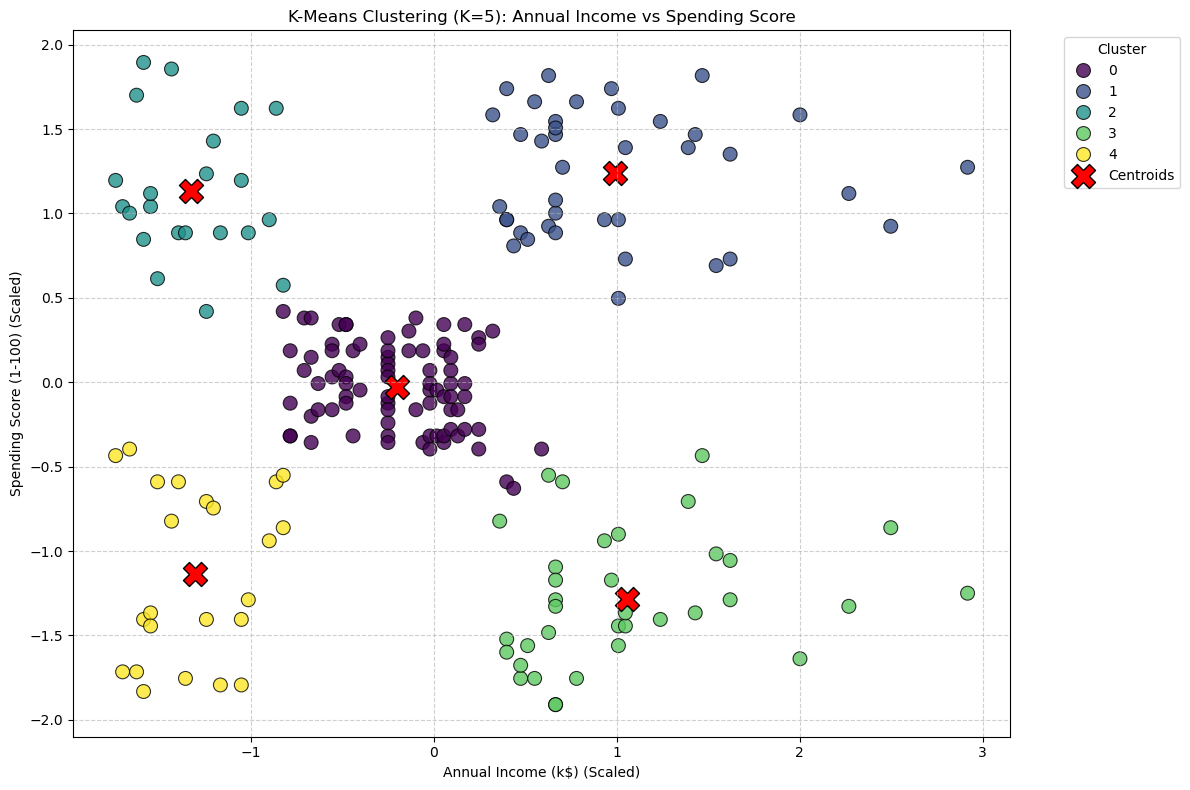


Clusters visualized and saved to kmeans_clusters_visualization.png.

Task 8: Step 4 complete.


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 8: Step 4 - Visualize clusters with color-coding ---")

# Re-define necessary variables from Step 1 for self-containment
df_customers = pd.read_csv('Mall_Customers.csv')
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)']
X_clustering = df_customers[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

# Determine optimal K from Elbow Method (from previous step's observation)
optimal_k = 5
print(f"\nUsing optimal K = {optimal_k} for K-Means clustering...")

# Fit KMeans with the optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_optimal.fit(X_scaled_df)

# Get the cluster labels and centroids
cluster_labels_optimal = kmeans_optimal.labels_
cluster_centroids = kmeans_optimal.cluster_centers_

# Add cluster labels to the scaled DataFrame for plotting
X_scaled_df['Cluster'] = cluster_labels_optimal

print("K-Means with optimal K fitted and cluster labels assigned.")
print(f"Number of data points in each cluster (optimal K={optimal_k}):\n{pd.Series(cluster_labels_optimal).value_counts().sort_index()}")


# Visualize clusters with color-coding
print("\nVisualizing clusters with color-coding and centroids...")
plt.figure(figsize=(12, 8))
# Use a color palette for the clusters
sns.scatterplot(x=X_scaled_df.iloc[:, 0], y=X_scaled_df.iloc[:, 1], hue='Cluster',
                data=X_scaled_df, palette='viridis', s=100, alpha=0.8, edgecolor='k')

# Plot the cluster centroids
# Centroids are in the scaled feature space
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1],
            s=300, c='red', marker='X', label='Centroids', edgecolor='black')

plt.title(f'K-Means Clustering (K={optimal_k}): Annual Income vs Spending Score')
plt.xlabel(features_for_clustering[0] + ' (Scaled)')
plt.ylabel(features_for_clustering[1] + ' (Scaled)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('kmeans_clusters_visualization.png') # Save the plot
plt.show()

print("\nClusters visualized and saved to kmeans_clusters_visualization.png.")
print("\nTask 8: Step 4 complete.")

## Observations

* **K-Means with Optimal K:** The K-Means algorithm was re-fitted using the optimal number of clusters, `K=5`, as determined by the Elbow Method in the previous step. The cluster labels were successfully assigned to the scaled data points.
* **Cluster Distribution (Optimal K=5):** The distribution of data points across the 5 clusters is as follows:
    * Cluster 0: 81 customers
    * Cluster 1: 39 customers
    * Cluster 2: 22 customers
    * Cluster 3: 35 customers
    * Cluster 4: 23 customers
    This distribution reflects the relative sizes of the identified customer segments.
* **Cluster Visualization (`kmeans_clusters_visualization.png`):**
    * The scatter plot clearly shows the five distinct clusters, each color-coded according to its assigned label.
    * Each cluster represents a different segment of customers based on their `Annual Income` and `Spending Score`.
    * **Red 'X' marks** indicate the centroids (mean position) of each cluster. These centroids are located at the approximate center of each cluster, confirming that K-Means effectively identified the natural groupings.
    * **Interpretation of Clusters (visual):**
        * One cluster (e.g., the purple/darkest cluster) appears to represent **high income, high spending** customers.
        * Another cluster (e.g., the light green/yellow cluster) represents **low income, high spending** customers.
        * A central cluster (e.g., blue) represents **average income, average spending** customers.
        * Two other clusters (e.g., light blue and orange) represent **high income, low spending** and **low income, low spending** customers, respectively.
    * The visualization confirms that K-Means successfully segmented the customer data into meaningful groups, which aligns well with the visual patterns observed in the initial scatter plot (Task 8 - Step 1).

## Evaluate clustering using Silhouette Score

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 8: Step 5 - Evaluate clustering using Silhouette Score ---")

# Re-define necessary variables from Step 1 for self-containment
df_customers = pd.read_csv('Mall_Customers.csv')
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)']
X_clustering = df_customers[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

# Optimal K determined from Elbow Method
optimal_k = 5
print(f"\nCalculating Silhouette Score for K-Means with optimal K = {optimal_k}...")

# Fit KMeans with the optimal K (re-fit to get labels if not already present from a previous run)
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_optimal.fit(X_scaled_df)
cluster_labels_optimal = kmeans_optimal.labels_

# Calculate the Silhouette Score
# The silhouette_score takes the data (X_scaled_df) and the assigned cluster labels
silhouette_avg = silhouette_score(X_scaled_df, cluster_labels_optimal)

print(f"\nAverage Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

# You can also visualize individual silhouette scores (optional but good for deeper analysis)
# from sklearn.metrics import silhouette_samples
# silhouette_vals = silhouette_samples(X_scaled_df, cluster_labels_optimal)

print("\nSilhouette Score evaluation complete.")
print("\nTask 8: Clustering with K-Means complete.")

--- Task 8: Step 5 - Evaluate clustering using Silhouette Score ---

Calculating Silhouette Score for K-Means with optimal K = 5...

Average Silhouette Score for K=5: 0.5547

Silhouette Score evaluation complete.

Task 8: Clustering with K-Means complete.


C:\Users\91961\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Observations

* **Silhouette Score Purpose:** The Silhouette Score is a valuable metric for evaluating the quality of a clustering. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1, where:
    * A score close to +1 indicates that the data point is well-matched to its own cluster and well-separated from other clusters.
    * A score close to 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
    * A score close to -1 indicates that the data point is likely assigned to the wrong cluster.
* **Average Silhouette Score:** For the K-Means clustering with `K=5`, the average Silhouette Score was calculated to be `0.5547`.
* **Interpretation:** An average Silhouette Score of approximately `0.55` suggests that the clusters are reasonably well-defined and distinct. While not extremely high (close to 1), it indicates a satisfactory clustering solution where data points are generally closer to their own cluster centroids than to other cluster centroids. This score aligns with the visual inspection from the cluster visualization, where distinct groups were apparent. The value confirms that K=5 is a good choice for these features.